# Week 3 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [3]:
no_games = 3

## Functions

In [4]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [5]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [6]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [7]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [8]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [9]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [10]:
print(offense.shape)
offense.head()

(461, 32)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3
0,Alvin Kamara,NOR,RB,25,3,2,0,0,0,0,0,31,153,13.40,3,31,27,285,15.60,3,0,0,6,0,0,93.30,1,1,79.80,18.70,29.40,31.70
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80
2,Aaron Jones,GNB,RB,26,3,3,0,0,0,0,0,50,303,6.60,4,18,10,95,14.00,1,1,0,5,0,0,74.80,2,3,69.80,13.60,41.60,14.60
3,Calvin Ridley,ATL,WR,26,3,3,0,0,0,0,0,2,6,3.00,0,35,21,349,22.20,4,0,0,4,0,0,70.00,1,4,59.50,24.90,22.90,11.70
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20


In [11]:
print(defense.shape)
defense.head()

(32, 26)


,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3
0,Indianapolis Colts,46,154,4.40,676,70,280,4.00,1,75,6.10,47,9.70,454,4,6,4,66.70,6,6,0,9,45.00,4.00,15.00,26.00
1,San Francisco 49ers,48,189,4.80,912,80,350,4.40,2,104,5.70,64,9.20,588,2,4,2,50.00,4,2,2,5,21.00,4.00,5.00,12.00
2,Baltimore Ravens,59,125,4.90,610,44,189,4.30,0,75,6.20,46,10.10,464,2,3,2,66.70,5,2,3,6,31.00,15.00,15.00,1.00
3,Los Angeles Chargers,59,188,5.40,1011,71,328,4.60,1,111,6.60,72,10.10,730,3,9,2,22.20,2,1,1,6,14.00,11.00,1.00,2.00
4,Pittsburgh Steelers,60,183,4.80,870,61,162,2.70,1,107,7.70,64,12.80,819,6,9,4,44.40,5,4,1,15,28.00,8.00,13.00,7.00


In [12]:
per_week(defense, 'Ttl_Pts_Allowed', no_games)
per_week(defense, 'Ttl_Yds', no_games)
per_week(defense, 'Rushing_Att', no_games)
per_week(defense, 'Rushing_Yds', no_games)
per_week(defense, 'Passing_Att', no_games)
per_week(defense, 'Completions', no_games)
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week(defense, 'Passing_Yds', no_games)
per_week(defense, 'Sacks', no_games)
per_week(defense, 'TTL', no_games)

In [13]:
offense[offense['Player'] == 'Mark Ingram']

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3
134,Mark Ingram,BAL,RB,31,3,3,0,0,0,0,0,26,114,7.80,1,4,2,22,11.00,0,0,0,1,0,0,20.60,39,,19.60,2.90,13.70,3.00


In [14]:
taken_wrt = ['Alvin Kamara', 'Aaron Jones', 'Calvin Ridley', 'Dalvin Cook', 'Tyler Lockett', 'Ezekiel Elliott', 
             'James Robinson', 'Nick Chubb', 'Josh Jacobs', 'Austin Ekeler', 'DK Metcalf', 'Tyreek Hill', 
             'Stefon Diggs', 'Christian McCaffrey', 'Kareem Hunt', 'Clyde Edwards-Helaire', 'Travis Kelce', 
             'James Conner', 'Juju Smith-Schuster', 'Robert Woods', 'Adam Thielen', 'Jonathan Taylor', 
             'Keenan Allen', 'Terry McLaurin', 'Raheem Mostert', 'Mike Evans', 'Davante Adams', 'Noah Fant', 
             'Amari Cooper', 'Tyler Higbee', 'Allen Robinson', 'Cooper Kupp', 'Michael Gallup', 'David Johnson', 
             'Julian Edelman', 'Mike Gesicki', 'Melvin Gordon', 'Darius Slayton', 'David Montgomery', 'Todd Gurley', 
             'Kenyan Drake', 'John Brown', 'CeeDee Lamb', 'Darren Waller', 'Miles Sanders', 'DJ Moore', 'Mike Davis', 
             'Devin Singletary', 'DeVantae Parker', 'T.J. Hockenson', 'Will Fuller', 'Hayden Hurst', 'Mark Andrews', 
             'J.K. Dobbins', 'Odell Beckham Jr.', 'Zach Ertz', 'Chris Godwin', 'Emmanuel Sanders', 'Jerry Jeudy', 
             'Joe Mixon', 'Jared Cook', 'DJ Chark', 'Jordan Howard', 'T.Y. Hilton', 'Evan Engram', 
             'Kenny Golladay', 'Zack Moss', 'Austin Hooper', 'George Kittle', 'A.J. Brown', 'Michael Thomas', 
             'Devonta Freeman', 'Tyler Boyd', 'Hunter Henry']


In [15]:
myteam_wrt = ['DeAndre Hopkins', 'Derrick Henry', 'Chris Carson', 'Robby Anderson', 'Jonnu Smith', 'Hunter Henry', 
              'Diontae Johnson', 'Julio Jones', "D'Andre Swift", 'Marquise Brown', 'Mark Ingram']

## QB Analysis

In [16]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20
6,Patrick Mahomes,KAN,QB,25,3,3,82,121,898,9,0,10,80,8.00,1,0,0,0,0.00,0,0,0,1,0,1,87.90,3,7,87.90,20.40,27.50,40.00
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50
13,Kyler Murray,ARI,QB,23,3,3,75,113,786,4,5,26,187,8.90,4,0,0,0,0.00,0,0,0,4,0,0,85.10,5,14,85.10,27.30,33.10,24.70


In [17]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [18]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80,26.33,34.33,0.77,308.33,4.67,30.00,34.33
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20,27.00,38.00,0.71,346.00,3.33,28.00,31.63
6,Patrick Mahomes,KAN,QB,25,3,3,82,121,898,9,0,10,80,8.00,1,0,0,0,0.00,0,0,0,1,0,1,87.90,3,7,87.90,20.40,27.50,40.00,27.33,40.33,0.68,299.33,3.00,26.67,29.30
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50,32.00,47.67,0.67,396.00,1.67,24.67,28.97
13,Kyler Murray,ARI,QB,23,3,3,75,113,786,4,5,26,187,8.90,4,0,0,0,0.00,0,0,0,4,0,0,85.10,5,14,85.10,27.30,33.10,24.70,25.00,37.67,0.66,262.00,1.33,62.33,28.37


In [19]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
count,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,40.00,43.00,43.00,43.00,43.00
mean,28.81,2.63,2.28,52.35,78.86,586.44,4.00,1.67,9.26,40.93,6.54,0.51,0.12,0.12,0.21,0.14,0.00,1.14,0.49,0.51,0.02,0.19,44.48,44.43,14.49,15.19,14.76,18.67,28.33,0.65,210.02,1.42,13.96,15.76
std,5.48,0.66,1.16,29.41,43.26,328.71,3.09,1.66,7.72,47.21,4.18,1.03,0.39,0.39,2.48,2.07,0.00,1.26,0.83,1.03,0.15,0.39,28.12,28.14,9.93,11.82,10.65,9.25,13.65,0.15,104.25,1.05,15.66,8.96
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,-3.00,0.00
25%,24.50,2.00,2.00,33.00,48.00,402.00,2.00,0.00,5.00,6.50,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.30,25.20,6.30,1.55,9.40,16.25,25.83,0.60,188.00,0.67,2.75,11.75
50%,28.00,3.00,3.00,63.00,95.00,699.00,4.00,1.00,7.00,27.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,50.70,50.70,16.80,15.50,14.30,21.33,32.00,0.67,238.00,1.50,9.00,17.63
75%,32.00,3.00,3.00,73.50,106.50,801.50,6.00,3.00,12.00,66.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,59.95,59.90,21.95,24.15,22.45,24.83,36.00,0.70,270.00,2.00,22.00,19.97
max,43.00,3.00,3.00,96.00,143.00,1188.00,14.00,6.00,35.00,187.00,18.80,4.00,2.00,2.00,15.00,12.00,0.00,4.00,3.00,4.00,1.00,1.00,103.00,103.00,31.80,39.80,40.00,32.00,47.67,1.00,396.00,4.67,62.33,34.33


In [20]:
quarterbacks[quarterbacks['Player'].isin(['Dak Prescott', 'Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50,32.00,47.67,0.67,396.00,1.67,24.67,28.97
22,Aaron Rodgers,GNB,QB,37,3,3,71,106,887,9,0,5,26,7.00,0,1,1,-6,-6.00,0,0,0,0,0,0,74.00,6,23,73.50,30.80,18.20,24.50,23.67,35.33,0.67,295.67,3.00,8.67,24.50


In [21]:
average, prescott, dak = print_metric(quarterbacks, 'PassingYds_pG', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', 22)

x = ['Average', prescott, rodgers]
y = [average, dak_pass_yds, aaron_pass_yds]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassingYds_pG: 210.02
Dak Prescott PassingYds_pG: 396.0
--------------------------------------------------
Avg PassingYds_pG: 210.02
Aaron Rodgers PassingYds_pG: 295.67
--------------------------------------------------


NameError: name 'dak_pass_yds' is not defined

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent: 0.65
Aaron Rodgers Completion_Percent: 0.67
--------------------------------------------------


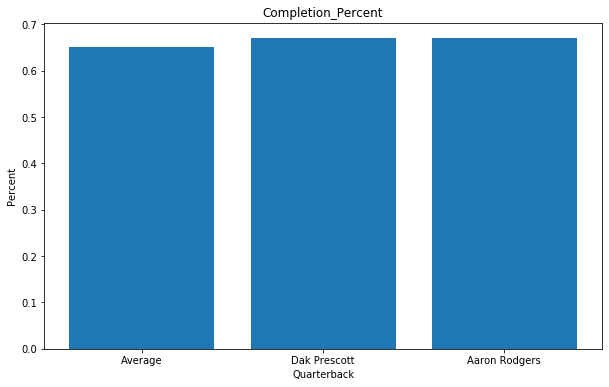

In [22]:
average, prescott, dak = print_metric(quarterbacks, 'Completion_Percent', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', 22)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Percent')

Avg TTL: 44.43
Dak Prescott TTL: 86.9
--------------------------------------------------
Avg TTL: 44.43
Aaron Rodgers TTL: 73.5
--------------------------------------------------


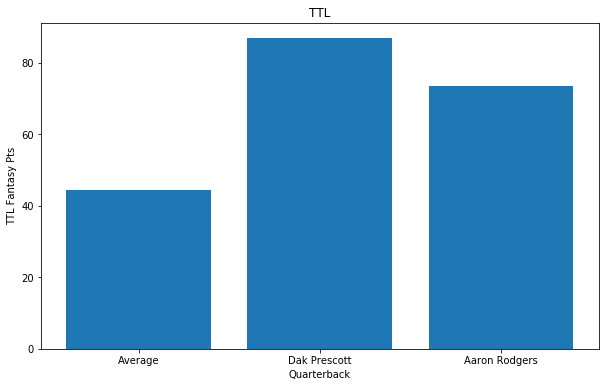

In [23]:
average, prescott, dak = print_metric(quarterbacks, 'TTL', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'TTL', 22)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'TTL', 'Quarterback', 'TTL Fantasy Pts')

Week 4 match ups:

    Dallas vs Cleveland
    Green Bay vs Atlanta

In [24]:
defense[defense['Team'].isin(['Cleveland Browns', 'Atlanta Falcons'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
23,Cleveland Browns,90,208,5.00,1043,76,282,3.70,3,124,6.60,79,10.40,824,8,13,10,76.90,7,3,4,8,18.00,0.00,4.00,14.00,30.00,347.67,25.33,94.00,41.33,26.33,0.64,274.67,2.67,6.00
30,Atlanta Falcons,111,217,6.40,1390,76,339,4.50,5,135,8.10,94,11.60,1088,9,14,11,78.60,5,2,3,6,7.00,-1.00,3.00,5.00,37.00,463.33,25.33,113.00,45.00,31.33,0.70,362.67,2.00,2.33


In [25]:
print('Prescott vs Cleveland Browns Summary:')
print('-' * 50)
print('')


print_metric(quarterbacks, 'PassesAttempted_pG', 8)
print_metric_team(defense, 'Passing_Att_pG', 23)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', 8)
print_metric_team(defense, 'Completions_pG', 23)
print('')
print_metric(quarterbacks, 'PassingYds_pG', 8)
print_metric_team(defense, 'Passing_Yds_pG', 23)
print('')
print_metric(quarterbacks, 'Completion_Percent', 8)
print_metric_team(defense, 'Completion_Percent_Allowed', 23)
print('')
print_metric(quarterbacks, 'PassingTDs', 8)
print_metric_team(defense, 'Passing_TDs', 23)


Prescott vs Cleveland Browns Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 28.33
Dak Prescott PassesAttempted_pG: 47.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Cleveland Browns Passing_Att_pG: 41.33
--------------------------------------------------

Avg CompletedPasses_pG: 18.67
Dak Prescott CompletedPasses_pG: 32.0
--------------------------------------------------
Avg Completions_pG: 23.05
Cleveland Browns Completions_pG: 26.33
--------------------------------------------------

Avg PassingYds_pG: 210.02
Dak Prescott PassingYds_pG: 396.0
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Cleveland Browns Passing_Yds_pG: 274.67
--------------------------------------------------

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Cleveland Browns Completion_Percent_Allowed: 0.64
--

(5.22, 'Cleveland Browns', 8)

In [26]:
print('Rodgers vs Atlanta Falcons Summary:')
print('-' * 50)
print('')


print_metric(quarterbacks, 'PassesAttempted_pG', 22)
print_metric_team(defense, 'Passing_Att_pG', 30)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', 22)
print_metric_team(defense, 'Completions_pG', 30)
print('')
print_metric(quarterbacks, 'PassingYds_pG', 22)
print_metric_team(defense, 'Passing_Yds_pG', 30)
print('')
print_metric(quarterbacks, 'Completion_Percent', 22)
print_metric_team(defense, 'Completion_Percent_Allowed', 30)
print('')
print_metric(quarterbacks, 'PassingTDs', 22)
print_metric_team(defense, 'Passing_TDs', 30)


Rodgers vs Atlanta Falcons Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 28.33
Aaron Rodgers PassesAttempted_pG: 35.33
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Atlanta Falcons Passing_Att_pG: 45.0
--------------------------------------------------

Avg CompletedPasses_pG: 18.67
Aaron Rodgers CompletedPasses_pG: 23.67
--------------------------------------------------
Avg Completions_pG: 23.05
Atlanta Falcons Completions_pG: 31.33
--------------------------------------------------

Avg PassingYds_pG: 210.02
Aaron Rodgers PassingYds_pG: 295.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Atlanta Falcons Passing_Yds_pG: 362.67
--------------------------------------------------

Avg Completion_Percent: 0.65
Aaron Rodgers Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Atlanta Falcons Completion_Percent_Allowed: 0.7
----

(5.22, 'Atlanta Falcons', 9)

This decision is a bit more complicated. Dallas is going up against a tougher defense with the Browns, but he's still outperforming what the Browns have so far allowed. Last week Prescott threw an impressive 472 yards, now averaging 396 on the season. The Browns have so far allowed 275 passing yards on average. Prescott seems to be a bigger part of the Dallas offense compared to Rodgesr who has attempted 35 passes in a game on average versus Prescott who has attempted nearly 48 passes. Both have a completion rate of 67%.

The interesting part is the Atlanta Falcons. The Falcons have allowed an average 363 passing yards so far this season. Quarterbacks have completed 70% of their passes. If I was deciding on Green Bay's strategy, I would definitely be putting the ball in the quarterback's hands. I'm tempted to take a bet that that's exactly what they'll do and Rodgers will outperform his projected 20.89 points. That's if I'm a betting person.

## Runningbacks

In [27]:
runningbacks = offense[offense['Position'] == 'RB']

In [28]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')

In [29]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
0,Alvin Kamara,NOR,RB,25,3,2,0,0,0,0,0,31,153,13.40,3,31,27,285,15.60,3,0,0,6,0,0,93.30,1,1,79.80,18.70,29.40,31.70,10.33,51.00,10.33,9.00
2,Aaron Jones,GNB,RB,26,3,3,0,0,0,0,0,50,303,6.60,4,18,10,95,14.00,1,1,0,5,0,0,74.80,2,3,69.80,13.60,41.60,14.60,16.67,101.00,6.00,3.33
5,Dalvin Cook,MIN,RB,25,3,3,0,0,0,0,0,48,294,7.30,4,9,5,24,12.00,0,1,1,4,3,0,62.30,3,6,59.80,20.80,15.10,23.90,16.00,98.00,3.00,1.67
9,Nick Chubb,CLE,RB,25,3,3,0,0,0,0,0,51,292,12.30,4,3,3,17,11.70,0,1,1,4,0,0,54.40,4,10,52.90,4.60,25.30,23.00,17.00,97.33,1.00,1.00
10,Ezekiel Elliott,DAL,RB,25,3,3,0,0,0,0,0,58,219,10.80,3,23,15,88,13.70,1,2,1,4,0,0,60.20,5,11,52.70,24.70,16.20,11.80,19.33,73.00,7.67,5.00


In [30]:
myteam_rbs = ['Chris Carson', 'Derrick Henry', 'Mark Ingram', "D'Andre Swift"]
taken_rbs = ['Alvin Kamara', 'Aaron Jones', 'Dalvin Cook', 'Ezekiel Elliott', 'James Robinson', 'Nick Chubb', 
             'Josh Jacobs', 'Austin Ekeler', 'Christian McCaffrey', 'Karrem Hunt', 'Clyde Edwards-Helaire', 
             'James Conner', 'Jonathan Taylor', 'Raheem Mostert', 'David Johnson', 
             'Melvin Gordon', 'David Montgomery', 'Todd Gurley', 'Kenyan Drake', 'Miles Sanders', 
             'Mike Davis', 'J.K. Dobbins', 'Joe Mixon', 'Jordan Howard', 'Zack Moss', 'Devonta Freeman', 
             'Devin Singletary']

In [31]:
myteam_rbs = myteam_rbs + myteam_wrt
taken_rbs = taken_rbs + taken_wrt

In [32]:
runningbacks[runningbacks['Player'].isin(myteam_rbs)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
18,Derrick Henry,TEN,RB,26,3,3,0,0,0,0,0,82,319,11.90,2,8,5,26,7.00,0,0,0,2,0,0,49.00,8,19,46.50,13.10,8.40,25.00,27.33,106.33,2.67,1.67
27,Chris Carson,SEA,RB,26,3,3,0,0,0,0,0,37,157,6.40,0,12,12,93,14.50,3,0,0,3,0,0,49.00,11,28,43.00,18.60,16.80,7.60,12.33,52.33,4.00,4.00
134,Mark Ingram,BAL,RB,31,3,3,0,0,0,0,0,26,114,7.80,1,4,2,22,11.00,0,0,0,1,0,0,20.60,39,,19.60,2.90,13.70,3.00,8.67,38.00,1.33,0.67
150,D'Andre Swift,DET,RB,21,3,0,0,0,0,0,0,8,20,7.00,1,12,9,94,14.40,0,0,0,1,0,0,21.90,43,,17.40,8.30,7.20,1.90,2.67,6.67,4.00,3.00


In [33]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_rbs)]

Avg RushingAttempts_pG: 4.59
Derrick Henry RushingAttempts_pG: 27.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Chris Carson RushingAttempts_pG: 12.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Mark Ingram RushingAttempts_pG: 8.67
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
D'Andre Swift RushingAttempts_pG: 2.67
--------------------------------------------------


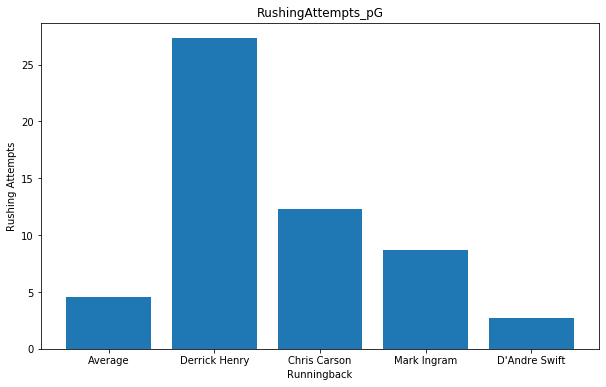

In [35]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', 18)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'RushingAttempts_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'RushingAttempts_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.98
Derrick Henry RushingYds_pG: 106.33
--------------------------------------------------
Avg RushingYds_pG: 18.98
Chris Carson RushingYds_pG: 52.33
--------------------------------------------------
Avg RushingYds_pG: 18.98
Mark Ingram RushingYds_pG: 38.0
--------------------------------------------------
Avg RushingYds_pG: 18.98
D'Andre Swift RushingYds_pG: 6.67
--------------------------------------------------


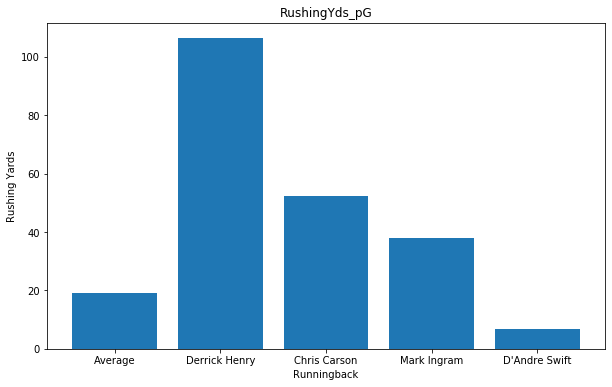

In [42]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', 18)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'RushingYds_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'RushingYds_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.59
Derrick Henry Targeted_pG: 2.67
--------------------------------------------------
Avg Targeted_pG: 1.59
Chris Carson Targeted_pG: 4.0
--------------------------------------------------
Avg Targeted_pG: 1.59
Mark Ingram Targeted_pG: 1.33
--------------------------------------------------
Avg Targeted_pG: 1.59
D'Andre Swift Targeted_pG: 4.0
--------------------------------------------------


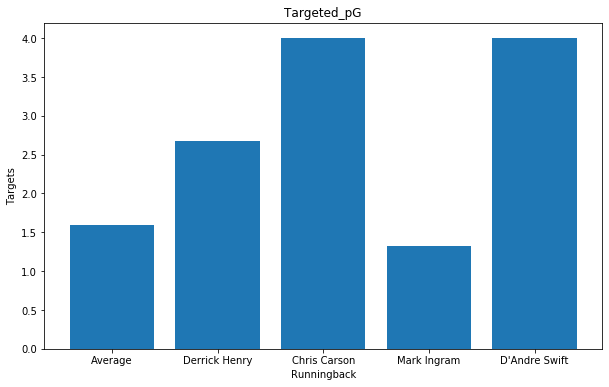

In [43]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', 18)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'Targeted_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'Targeted_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.23
Derrick Henry Receptions_pG: 1.67
--------------------------------------------------
Avg Receptions_pG: 1.23
Chris Carson Receptions_pG: 4.0
--------------------------------------------------
Avg Receptions_pG: 1.23
Mark Ingram Receptions_pG: 0.67
--------------------------------------------------
Avg Receptions_pG: 1.23
D'Andre Swift Receptions_pG: 3.0
--------------------------------------------------


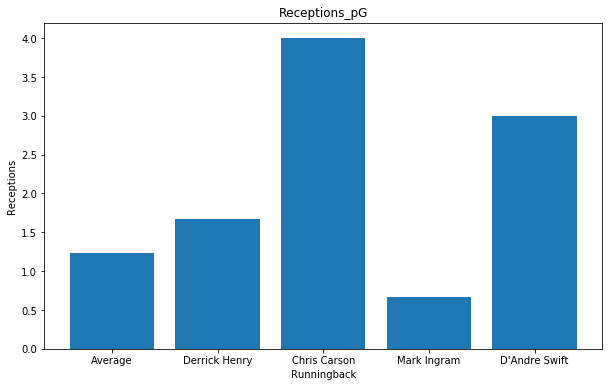

In [45]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', 18)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'Receptions_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'Receptions_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [41]:
top_availRBs = available_rbs[available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5]
print(round(available_rbs['RushingYds_pG'].mean(), 2))
top_availRBs.head(10)

18.98


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
18,Derrick Henry,TEN,RB,26,3,3,0,0,0,0,0,82,319,11.90,2,8,5,26,7.00,0,0,0,2,0,0,49.00,8,19,46.50,13.10,8.40,25.00,27.33,106.33,2.67,1.67
27,Chris Carson,SEA,RB,26,3,3,0,0,0,0,0,37,157,6.40,0,12,12,93,14.50,3,0,0,3,0,0,49.00,11,28,43.00,18.60,16.80,7.60,12.33,52.33,4.00,4.00
40,Jerick McKinnon,SFO,RB,28,3,1,0,0,0,0,0,20,139,15.50,2,10,6,59,17.30,1,0,0,3,0,0,40.80,16,41,37.80,10.40,13.70,13.70,6.67,46.33,3.33,2.00
44,Darrell Henderson,LAR,RB,23,3,1,0,0,0,0,0,35,201,12.40,2,6,3,46,18.30,0,0,0,2,0,0,38.20,18,45,36.70,0.60,18.10,18.00,11.67,67.00,2.00,1.00
98,Malcolm Brown,LAR,RB,27,3,0,0,0,0,0,0,36,145,4.30,2,6,3,31,13.30,0,0,0,2,0,0,31.10,25,,29.60,23.00,4.70,1.90,12.00,48.33,2.00,1.00
101,Leonard Fournette,TAM,RB,25,3,0,0,0,0,0,0,24,123,6.30,2,8,7,34,12.60,0,0,0,2,0,0,31.20,27,,27.70,1.90,23.60,2.20,8.00,41.00,2.67,2.33
102,Joshua Kelley,LAC,RB,23,3,0,0,0,0,0,0,43,167,11.80,1,4,4,58,19.00,0,1,1,1,0,0,28.50,28,,26.50,12.00,11.30,3.20,14.33,55.67,1.33,1.33
104,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,30,,25.60,9.70,1.90,14.00,8.67,57.67,1.00,0.67
105,Antonio Gibson,WAS,RB,22,3,2,0,0,0,0,0,31,140,9.20,2,7,6,16,8.70,0,1,1,2,0,0,28.60,31,,25.60,4.40,11.20,10.00,10.33,46.67,2.33,2.00
109,Adrian Peterson,DET,RB,35,3,1,0,0,0,0,0,43,209,12.60,0,4,4,31,14.50,0,0,0,0,0,0,26.00,36,,24.00,11.40,4.10,8.50,14.33,69.67,1.33,1.33


One RB I'm really interested in is Darrell Henderson (LAR). He has averaged 67 yards per game and 12 attempts per game. Last week, he rushed for 20 times and 114 yards. He's definitely stepping up in terms of being apart of the game.

I want to compare him to my active RBs for this week along with the teams that each player will be facing. Derrick Henry of the Titans will not be playing as his game is delayed due to COVID. Naturally, he's my top performer and never leaving my team and only leaving my active roster because he's not playing.

In [48]:
defense[defense['Team'].isin(['New York Giants', 'Miami Dolphins', 'New Orleans Saints', 'Washington Football Team'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
9,Miami Dolphins,66,185,6.50,1198,82,401,4.90,5,96,8.80,69,12.20,845,4,8,7,87.50,4,1,3,7,16.00,2.00,2.00,12.00,22.00,399.33,27.33,133.67,32.00,23.00,0.72,281.67,2.33,5.33
17,New York Giants,83,201,5.30,1073,97,369,3.80,3,96,7.90,64,11.90,762,6,12,8,66.70,3,2,1,8,11.00,4.00,9.00,-2.00,27.67,357.67,32.33,123.00,32.00,21.33,0.67,254.00,2.67,3.67
18,Washington Football Team,84,202,5.00,1003,86,375,4.40,4,103,6.90,66,10.80,712,5,12,7,58.30,4,3,1,13,20.00,15.00,4.00,1.00,28.00,334.33,28.67,125.00,34.33,22.00,0.64,237.33,4.33,6.67
25,New Orleans Saints,98,200,5.30,1056,87,300,3.40,3,106,7.60,72,11.20,806,8,12,10,83.30,4,2,2,7,16.00,15.00,4.00,-3.00,32.67,352.00,29.00,100.00,35.33,24.00,0.68,268.67,2.33,5.33


In [53]:
print('Carson vs Miami Dolphins Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 27)
print_metric_team(defense, 'Rushing_Att_pG', 9)
print('')
print_metric(runningbacks, 'RushingYds_pG', 27)
print_metric_team(defense, 'Rushing_Yds_pG', 9)

Carson vs Miami Dolphins Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Chris Carson RushingAttempts_pG: 12.33
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Miami Dolphins Rushing_Att_pG: 27.33
--------------------------------------------------

Avg RushingYds_pG: 29.0
Chris Carson RushingYds_pG: 52.33
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
Miami Dolphins Rushing_Yds_pG: 133.67
--------------------------------------------------


(118.23, 'Miami Dolphins', 133.67)

In [54]:
print('Ingram vs Washington Football Team Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 134)
print_metric_team(defense, 'Rushing_Att_pG', 18)
print('')
print_metric(runningbacks, 'RushingYds_pG', 134)
print_metric_team(defense, 'Rushing_Yds_pG', 18)

Ingram vs Washington Football Team Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Mark Ingram RushingAttempts_pG: 8.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Washington Football Team Rushing_Att_pG: 28.67
--------------------------------------------------

Avg RushingYds_pG: 29.0
Mark Ingram RushingYds_pG: 38.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
Washington Football Team Rushing_Yds_pG: 125.0
--------------------------------------------------


(118.23, 'Washington Football Team', 125.0)

In [55]:
print('Swift vs New Orleans Saints Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 150)
print_metric_team(defense, 'Rushing_Att_pG', 25)
print('')
print_metric(runningbacks, 'RushingYds_pG', 150)
print_metric_team(defense, 'Rushing_Yds_pG', 25)

Swift vs New Orleans Saints Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
D'Andre Swift RushingAttempts_pG: 2.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
New Orleans Saints Rushing_Att_pG: 29.0
--------------------------------------------------

Avg RushingYds_pG: 29.0
D'Andre Swift RushingYds_pG: 6.67
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
New Orleans Saints Rushing_Yds_pG: 100.0
--------------------------------------------------


(118.23, 'New Orleans Saints', 100.0)

In [56]:
print('Henderson vs New York Giants Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 44)
print_metric_team(defense, 'Rushing_Att_pG', 17)
print('')
print_metric(runningbacks, 'RushingYds_pG', 44)
print_metric_team(defense, 'Rushing_Yds_pG', 17)

Henderson vs New York Giants Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Darrell Henderson RushingAttempts_pG: 11.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
New York Giants Rushing_Att_pG: 32.33
--------------------------------------------------

Avg RushingYds_pG: 29.0
Darrell Henderson RushingYds_pG: 67.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
New York Giants Rushing_Yds_pG: 123.0
--------------------------------------------------


(118.23, 'New York Giants', 123.0)

Right away I see that Swift is underperforming, not to mention facing the Saints who have allowed fewer yards on the ground than the average. I want to swap him for Henderson.

Now the decision on who to start. Carson is a no brainer. The Dolphins have allowed the most yards on the ground out of all these teams on average. Ingram and Henderson look like they're facing similar opponents, allowing on average ~125 yards. Ingram has averaged less than 9 carries versus Henderson's nearly 12. I plan to start Henderson because he's had more yards per game than Ingram and hopefully I don't regret that.

## Tight End

In [58]:
tight_ends = offense[offense['Position'] == 'TE']

In [59]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')

In [60]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
23,Travis Kelce,KAN,TE,31,3,3,0,0,0,0,0,0,0,0.00,0,27,21,227,18.10,2,0,0,2,0,0,45.20,2,24,34.70,11.00,15.00,8.70,9.00,7.00,75.67
28,Tyler Higbee,LAR,TE,27,3,3,0,0,0,0,0,0,0,0.00,0,11,10,134,17.00,3,0,0,3,1,0,38.40,3,29,33.40,4.00,23.40,6.00,3.67,3.33,44.67
32,Noah Fant,DEN,TE,23,3,3,0,0,0,0,0,0,0,0.00,0,21,14,184,14.40,2,0,0,2,1,0,39.40,4,33,32.40,14.10,13.70,4.60,7.00,4.67,61.33
38,Mike Gesicki,MIA,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,19,12,175,19.80,2,0,0,2,0,0,35.50,5,39,29.50,3.00,19.00,7.50,6.33,4.00,58.33


In [61]:
myteam_te = ['Jonnu Smith', 'Hunter Henry']
taken_te = ['Travis Kelce', 'Noah Fant', 'Tyler Higbee', 'Mike Gesicki', 'Darren Waller', 'T.J. Hockenson', 
            'Hayden Hurst', 'Mark Andrews', 'Zack Ertz', 'Jared Cook', 'Evan Engram', 'Austin Hooper', 
            'George Kittle']

In [63]:
myteam_te = myteam_te + myteam_wrt
taken_te = taken_te + taken_wrt

In [64]:
tight_ends[tight_ends['Player'].isin(myteam_te)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
76,Hunter Henry,LAC,TE,26,3,3,0,0,0,0,0,0,0,0.00,0,23,16,206,20.80,0,0,0,0,0,0,28.60,12,77,20.60,7.30,8.30,5.00,7.67,5.33,68.67


In [67]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_te)]
available_te.head(5)

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
42,Jimmy Graham,CHI,TE,34,3,3,0,0,0,0,0,0,0,0.00,0,18,10,103,13.00,3,1,0,3,0,0,33.30,6,43,28.30,8.50,1.80,18.00,6.00,3.33,34.33
55,Mo Alie-Cox,IND,TE,27,3,1,0,0,0,0,0,0,0,0.00,0,11,10,181,19.00,1,0,0,1,0,0,29.10,7,56,24.10,2.00,11.10,11.00,3.67,3.33,60.33
125,Jordan Reed,SFO,TE,30,3,0,0,0,0,0,0,0,0,0.00,0,16,11,85,14.30,2,0,0,2,0,0,26.00,13,,20.50,1.20,17.00,2.30,5.33,3.67,28.33
128,Robert Tonyan,GNB,TE,26,3,2,0,0,0,0,0,0,0,0.00,0,8,7,75,17.10,2,0,0,2,0,0,23.00,15,,19.50,0.00,8.50,11.00,2.67,2.33,25.00


In [87]:
defense[defense['TEAM'].isin(['Minnesota Vikings', 'Jacksonville Jaguars', 'Buffalo Bills'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
12,Buffalo Bills,52,125,5.30,664,37,151,4.10,2,82,6.60,52,10.40,543,3,7,4,57.10,2,1,1,6,10.00,8.00,2.00,26.00,332.00,75.50,271.50
17,Jacksonville Jaguars,61,128,6.20,799,56,211,3.80,1,70,8.60,54,11.10,602,5,9,6,66.70,2,2,0,2,6.00,6.00,0.00,30.50,399.50,105.50,301.00
30,Minnesota Vikings,88,143,6.10,876,72,309,4.30,2,69,8.40,51,11.30,578,5,10,5,50.00,1,1,0,2,-1.00,-4.00,3.00,44.00,438.00,154.50,289.00


I immediately know I want to pick up Jonnu Smith from Tennesse. He's been targeted 12 times which is nearly double the average. He completed 75% of those targets for 120 yards, 15 yds/reception. I'm excited to bring him on. I still plan on starting Hunter Henry, but he is questionable right now.

## Wide Receiver

In [93]:
wrs = df[df['Position'] == 'WR']

In [94]:
wrs['Targets_pGame'] = wrs['Targeted']/wrs['Games']
wrs['Receptions_pGame'] = wrs['Receptions']/wrs['Games']
wrs['Yds_pGame'] = wrs['ReceivingYds']/wrs['Games']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [95]:
wrs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
1,Calvin Ridley,ATL,WR,26,2,2,0,0,0,0,0,1,-1,-1.00,0,22,16,239,23.40,4,0,0,4,0,0,55.80,1,2,47.80,24.90,22.90,11.00,8.00,119.50
15,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,2,16,31.20,27.60,3.60,10.00,8.50,96.00
16,D.K. Metcalf,SEA,WR,23,2,2,0,0,0,0,0,0,0,0.00,0,14,8,187,26.80,2,0,0,2,0,0,34.70,3,17,30.70,15.50,15.20,7.00,4.00,93.50
17,Stefon Diggs,BUF,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,22,16,239,23.40,1,0,0,1,0,0,37.90,4,18,29.90,8.60,21.30,11.00,8.00,119.50
21,Robby Anderson,CAR,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,18,15,223,22.70,1,1,1,1,1,0,35.80,5,22,28.40,19.50,8.90,9.00,7.50,111.50
22,Adam Thielen,MIN,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,9,141,21.70,2,0,0,2,1,0,32.60,6,23,28.10,25.00,3.10,8.00,4.50,70.50
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
24,Tyreek Hill,KAN,WR,26,2,2,0,0,0,0,0,1,9,9.00,0,17,10,145,19.00,2,0,0,2,0,0,32.40,8,25,27.40,10.60,16.80,8.50,5.00,72.50
26,John Brown,BUF,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,10,152,17.00,2,0,0,2,0,0,32.20,9,27,27.20,13.00,14.20,8.00,5.00,76.00
29,Julian Edelman,NWE,WR,34,2,0,0,0,0,0,0,1,23,23.00,0,18,13,236,19.50,0,0,0,0,0,0,32.40,10,30,25.90,8.00,17.90,9.00,6.50,118.00


In [96]:
wrs[wrs['Player'].isin(['DeAndre Hopkins', 'Marquise Brown', 'Diontae Johnson', 'Julio Jones', 'A.J. Green'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
62,Diontae Johnson,PIT,WR,24,2,2,0,0,0,0,0,0,0,0.00,0,23,14,149,16.40,1,1,1,1,0,0,25.90,22,63,18.90,3.70,15.20,11.50,7.00,74.50
67,Julio Jones,ATL,WR,31,2,2,0,0,0,0,0,0,0,0.00,0,16,11,181,20.50,0,0,0,0,0,0,23.60,25,68,18.10,15.70,2.40,8.00,5.50,90.50
126,Marquise Brown,BAL,WR,23,2,1,0,0,0,0,0,0,0,0.00,0,12,10,143,17.00,0,0,0,0,0,0,19.30,38,,14.30,10.10,4.20,6.00,5.00,71.50
189,A.J. Green,CIN,WR,32,2,2,0,0,0,0,0,0,0,0.00,0,22,8,80,10.00,0,0,0,0,0,0,12.00,79,,8.00,5.10,2.90,11.00,4.00,40.00


In [97]:
wrs[wrs['Targets_pGame'] > wrs['Targets_pGame'].mean()*1.25]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
1,Calvin Ridley,ATL,WR,26,2,2,0,0,0,0,0,1,-1,-1.00,0,22,16,239,23.40,4,0,0,4,0,0,55.80,1,2,47.80,24.90,22.90,11.00,8.00,119.50
15,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,2,16,31.20,27.60,3.60,10.00,8.50,96.00
16,D.K. Metcalf,SEA,WR,23,2,2,0,0,0,0,0,0,0,0.00,0,14,8,187,26.80,2,0,0,2,0,0,34.70,3,17,30.70,15.50,15.20,7.00,4.00,93.50
17,Stefon Diggs,BUF,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,22,16,239,23.40,1,0,0,1,0,0,37.90,4,18,29.90,8.60,21.30,11.00,8.00,119.50
21,Robby Anderson,CAR,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,18,15,223,22.70,1,1,1,1,1,0,35.80,5,22,28.40,19.50,8.90,9.00,7.50,111.50
22,Adam Thielen,MIN,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,9,141,21.70,2,0,0,2,1,0,32.60,6,23,28.10,25.00,3.10,8.00,4.50,70.50
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
24,Tyreek Hill,KAN,WR,26,2,2,0,0,0,0,0,1,9,9.00,0,17,10,145,19.00,2,0,0,2,0,0,32.40,8,25,27.40,10.60,16.80,8.50,5.00,72.50
26,John Brown,BUF,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,10,152,17.00,2,0,0,2,0,0,32.20,9,27,27.20,13.00,14.20,8.00,5.00,76.00
29,Julian Edelman,NWE,WR,34,2,0,0,0,0,0,0,1,23,23.00,0,18,13,236,19.50,0,0,0,0,0,0,32.40,10,30,25.90,8.00,17.90,9.00,6.50,118.00


In [99]:
metric = 'Targets_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Targets_pGame: 4.91
Brown Targets_pGame: 6.0
Anderson Targets_pGame: 9.0


In [100]:
metric = 'Receptions_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Receptions_pGame: 3.29
Brown Receptions_pGame: 5.0
Anderson Receptions_pGame: 7.5


In [101]:
metric = 'Yds_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Yds_pGame: 41.76
Brown Yds_pGame: 71.5
Anderson Yds_pGame: 111.5


In [103]:
metric = 'FDFantasyPts'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average FDFantasyPts: 13.96
Brown FDFantasyPts: 19.3
Anderson FDFantasyPts: 35.8


In [105]:
defense[defense['TEAM'].isin(['Kansas City Chiefs', 'Los Angeles Chargers'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
1,Los Angeles Chargers,41,137,5.20,709,50,247,4.90,1,83,6.00,50,9.90,495,2,3,1,33.30,2,1,1,4,12.00,11.00,1.00,20.50,354.50,123.50,247.50
8,Kansas City Chiefs,48,137,6.10,839,66,301,4.60,3,65,8.70,42,13.40,564,2,6,5,83.30,2,2,0,6,12.00,7.00,5.00,24.00,419.50,150.50,282.00


## Defense

In [106]:
df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'Ttl_Fant', 'Week_1', 'Week_2'],
      dtype='object')

In [10]:
ttl_offense = df[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [11]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs
Team,,,,,,,,,,,,,,,
ARI,75,113,786,4,5,95,449,5,104,75,786,4,3,0,9
ATL,80,129,961,7,2,79,327,3,126,80,961,7,0,0,10
BAL,54,78,585,5,0,88,499,3,75,54,585,5,5,2,9
BUF,81,114,1038,10,1,76,311,2,112,81,1038,10,4,4,12
CAR,77,104,871,2,2,74,296,4,102,77,871,2,3,2,6


In [8]:
defense['PtspGame'] = defense['Ttl_Pts_Allowed']/no_games
defense['YdspGame'] = defense['Ttl_Yds']/no_games
defense['RushYdspGame'] = defense['Rushing_Yds']/no_games
defense['PassYdspGame'] = defense['Passing_Yds']/no_games

In [111]:
defense[defense['TEAM'] == 'Chicago Bears']

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
5,Chicago Bears,45,134,5.40,721,47,213,4.50,2,82,6.60,49,11.00,538,1,8,3,37.50,3,2,1,5,15.00,3.00,12.00,22.50,360.50,106.50,269.00


In [115]:
offense.reset_index(inplace=True)

In [117]:
offense[offense['Team'] == 'ATL']

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs
1,ATL,61,91,723,6,1,54,183,1,88,61,723,6,0,0,7


In [118]:
defense

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
0,Baltimore Ravens,28,125,4.90,610,44,189,4.30,0,75,6.20,46,10.10,464,2,3,2,66.70,5,2,3,6,30.00,15.00,15.00,14.00,305.00,94.50,232.00
1,Los Angeles Chargers,41,137,5.20,709,50,247,4.90,1,83,6.00,50,9.90,495,2,3,1,33.30,2,1,1,4,12.00,11.00,1.00,20.50,354.50,123.50,247.50
2,Pittsburgh Steelers,43,136,4.50,610,46,133,2.90,0,80,6.90,45,12.30,555,4,7,2,28.60,4,3,1,10,21.00,8.00,13.00,21.50,305.00,66.50,277.50
3,Arizona Cardinals,43,121,5.60,682,48,240,5.00,1,66,7.30,38,12.70,482,3,7,2,28.60,2,0,2,7,13.00,4.00,9.00,21.50,341.00,120.00,241.00
4,Los Angeles Rams,43,138,5.40,743,53,257,4.80,3,82,6.20,51,10.00,508,1,7,4,57.10,3,2,1,3,11.00,4.00,7.00,21.50,371.50,128.50,254.00
5,Chicago Bears,45,134,5.40,721,47,213,4.50,2,82,6.60,49,11.00,538,1,8,3,37.50,3,2,1,5,15.00,3.00,12.00,22.50,360.50,106.50,269.00
6,San Francisco 49ers,46,140,4.90,681,65,284,4.40,2,72,5.70,47,8.70,409,2,4,2,50.00,1,1,0,3,9.00,4.00,5.00,23.00,340.50,142.00,204.50
7,Denver Broncos,48,142,5.50,787,56,239,4.30,1,84,6.70,58,9.70,560,4,6,3,50.00,2,1,1,2,7.00,2.00,5.00,24.00,393.50,119.50,280.00
8,Kansas City Chiefs,48,137,6.10,839,66,301,4.60,3,65,8.70,42,13.40,564,2,6,5,83.30,2,2,0,6,12.00,7.00,5.00,24.00,419.50,150.50,282.00
9,Indianapolis Colts,49,94,4.40,416,41,171,4.20,1,46,6.20,30,9.50,286,3,4,3,75.00,3,3,0,7,19.00,4.00,15.00,24.50,208.00,85.50,143.00
